In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

In [42]:
data = load_breast_cancer()
x = data.data
y = data.target
X_full = pd.DataFrame(data.data, columns=data.feature_names)
y_full = pd.Series(data.target)

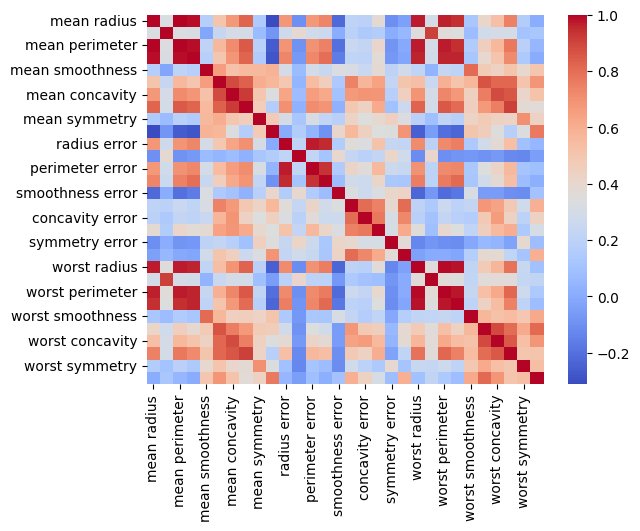

In [43]:
sns.heatmap(X_full.corr(), fmt=".2f", cmap="coolwarm")
plt.show()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

In [45]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [46]:
def modelEvaluation(model, X, y, X_test, y_test):
    y_pred = model.predict(X_test.values)
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, target_names=[str(c) for c in model.classes_]))

In [47]:
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_param_grid = {
    'max_depth': [8, 12, 16, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 8],
    'max_features': ['sqrt', None]
}
dt_grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
dt_grid_search.fit(x_train_scaled, y_train)
print(f"Mejores parámetros para Decision Tree: {dt_grid_search.best_params_}")
print(f"Mejor score: {dt_grid_search.best_score_:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros para Decision Tree: {'max_depth': 8, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5}
Mejor score: 0.9272


In [48]:
tree = DecisionTreeClassifier(min_samples_split=5, 
                              min_samples_leaf=3,
                              max_features=None, 
                              max_depth=8, 
                              class_weight='balanced', 
                              random_state=42)
tree.fit(x_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,5
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [49]:
modelEvaluation(tree, x, y, x_test, y_test)

Accuracy: 87.13%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        63
           1       0.83      1.00      0.91       108

    accuracy                           0.87       171
   macro avg       0.92      0.83      0.85       171
weighted avg       0.89      0.87      0.86       171

